In [1]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle, islice
from sklearn.decomposition import PCA
from minisom import MiniSom

from matplotlib.ticker import MaxNLocator

from multiprocessing import Pool

import hdbscan
import re
import os
import glob

In [3]:
os.chdir('/Landmark1/Dev_Data/LULA/horizontes/area_lula/attributs/')

#os.chdir('/home/data_science/git_projects/shashwat')

In [6]:
def read_raw(pname):
    file = open(pname, 'r')        
    file.seek(81, 0)
    data = np.array(file.read().split('\n')[81:])
    pattern = re.compile(r'(?<=[\-+0-9])\s+(?=[\-+0-9])')
    data = [re.sub(pattern, ',', i).lstrip().split(',') for i in data]
    df = pd.DataFrame(data)
    atr_name = pname.split("_")[-1].split(".")[0]
    df.columns = ['inline', 'xline', 'x', 'y', atr_name]
    df.drop(['inline', 'xline'], axis=1, inplace=True)
    df = df.set_index(['x', 'y'])
#     df.drop(['x', 'y'], axis=1, inplace=True)
#     df = df.set_index(['inline', 'xline'])
    return df

In [6]:
def make_hist(atr_name):
    plt.figure(figsize=[14,8])
    n, bins, patches = plt.hist(x=d[atr_name][atr_name], bins=75, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.60)
    plt.xlabel('Attribute Value',fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel('Count',fontsize=12)
    plt.title(str(atr_name) + ' Histogram',fontsize=15)
    f_name = str(atr_name) +' _hist.png'
    plt.savefig(f_name)

In [7]:
def col_hist(df, c):
    plt.figure(figsize=[14,8])
    n, bins, patches = plt.hist(x=df, bins=75, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.60)
    plt.xlabel('Attribute Value',fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel('Count',fontsize=12)
    plt.title(str(c) + ' Histogram',fontsize=15)
    plt.show()

In [4]:
extension = 'dat'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

['IMA_LULA_BVE300_topo_P_abril_2017_Disc.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_R3.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_QFact.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_CosPhs.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_RMSFreq.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_DiscDip.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_RespFreq.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_ThinBind.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_Structure.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_PhsResp.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_RelAmpChng.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_Azm.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_Dip.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_InsFreq.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_AvgFreq.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_RefStr.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_InsBand.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_RMS_AMP.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_AppPol.dat',
 'IMA_LULA_BVE300_topo_P_abril_2017_InsPhs.dat']

In [7]:
j =  0
d = {}
start_time = time.time()
for f in all_filenames:
    name = str(all_filenames[j]).split("_")[-1].split(".")[0]
    print("File "+ f+ " will be dataframe "+ name)
    fp = '/Landmark1/Dev_Data/LULA/horizontes/area_lula/attributs/' + f
    d[name] = read_raw(fp)
    j = j + 1
    
print("--- %s seconds ---" % (time.time() - start_time))

File IMA_LULA_BVE300_topo_P_abril_2017_Disc.dat will be dataframe Disc
File IMA_LULA_BVE300_topo_P_abril_2017_R3.dat will be dataframe R3
File IMA_LULA_BVE300_topo_P_abril_2017_QFact.dat will be dataframe QFact
File IMA_LULA_BVE300_topo_P_abril_2017_CosPhs.dat will be dataframe CosPhs
File IMA_LULA_BVE300_topo_P_abril_2017_RMSFreq.dat will be dataframe RMSFreq
File IMA_LULA_BVE300_topo_P_abril_2017_DiscDip.dat will be dataframe DiscDip
File IMA_LULA_BVE300_topo_P_abril_2017_RespFreq.dat will be dataframe RespFreq
File IMA_LULA_BVE300_topo_P_abril_2017_ThinBind.dat will be dataframe ThinBind
File IMA_LULA_BVE300_topo_P_abril_2017_Structure.dat will be dataframe Structure
File IMA_LULA_BVE300_topo_P_abril_2017_PhsResp.dat will be dataframe PhsResp
File IMA_LULA_BVE300_topo_P_abril_2017_RelAmpChng.dat will be dataframe RelAmpChng
File IMA_LULA_BVE300_topo_P_abril_2017_Azm.dat will be dataframe Azm
File IMA_LULA_BVE300_topo_P_abril_2017_Dip.dat will be dataframe Dip
File IMA_LULA_BVE300_to

In [12]:
for n in d.keys():
    d[n] = d[n].dropna()
    d[n] = d[n][~d[n].index.duplicated()]
    d[n] = d[n].astype(float)
    

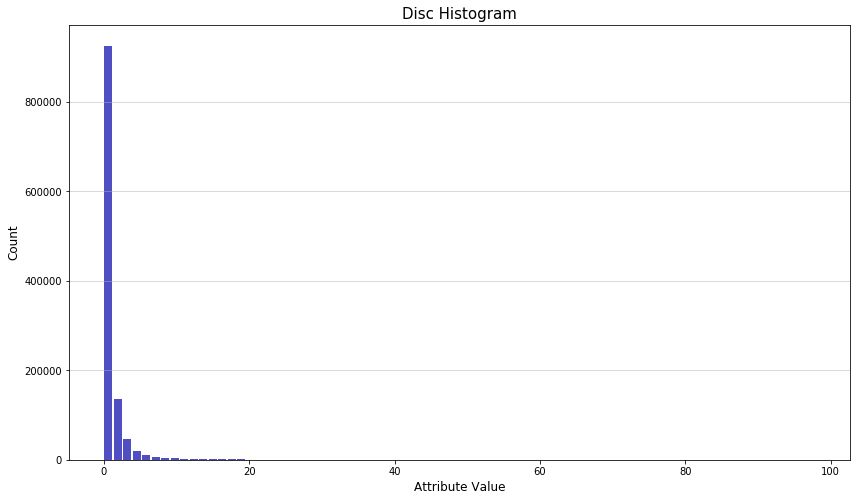

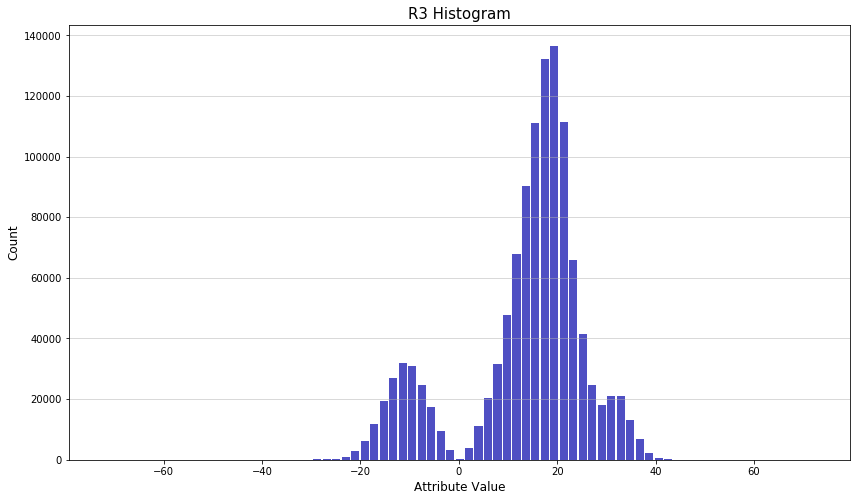

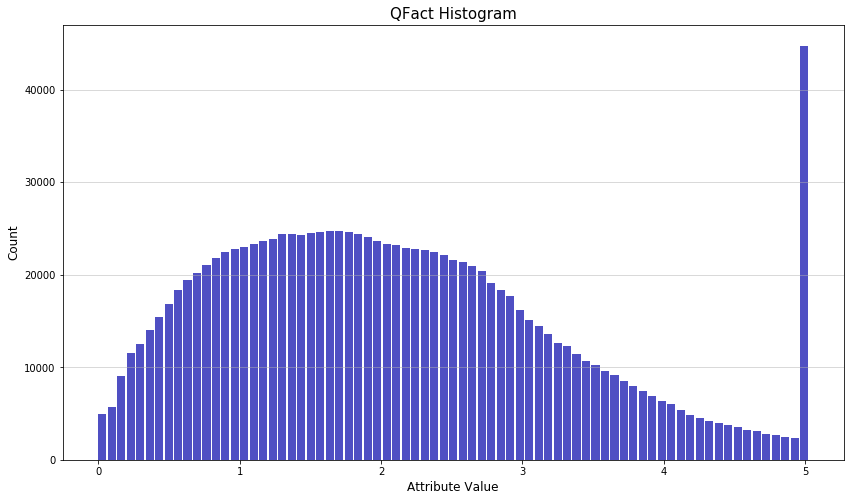

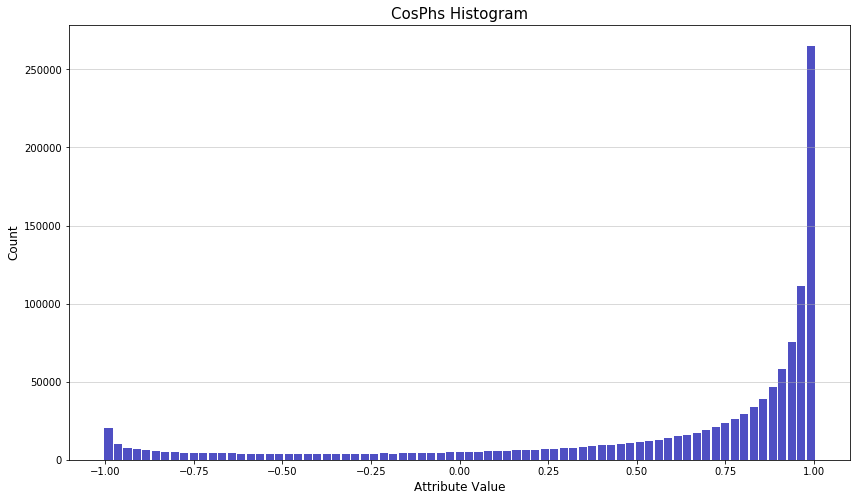

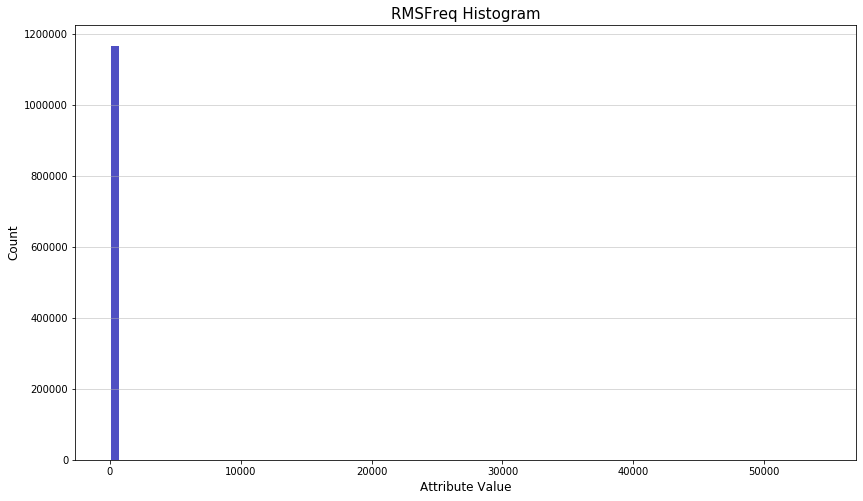

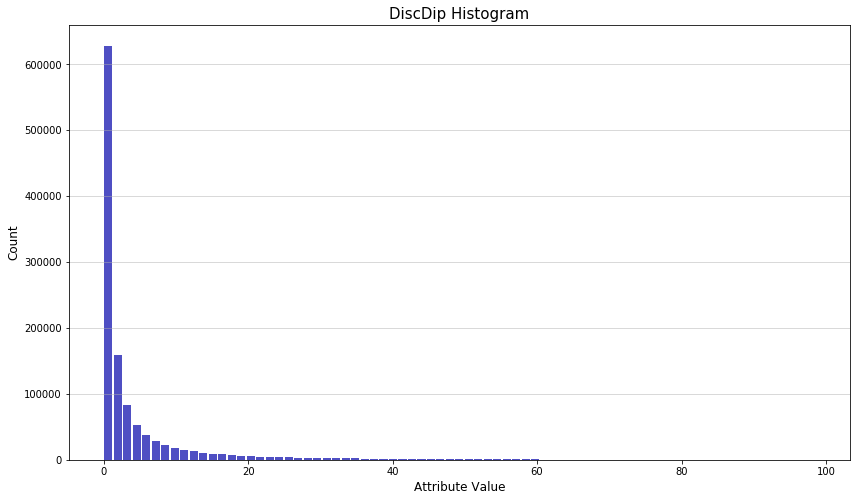

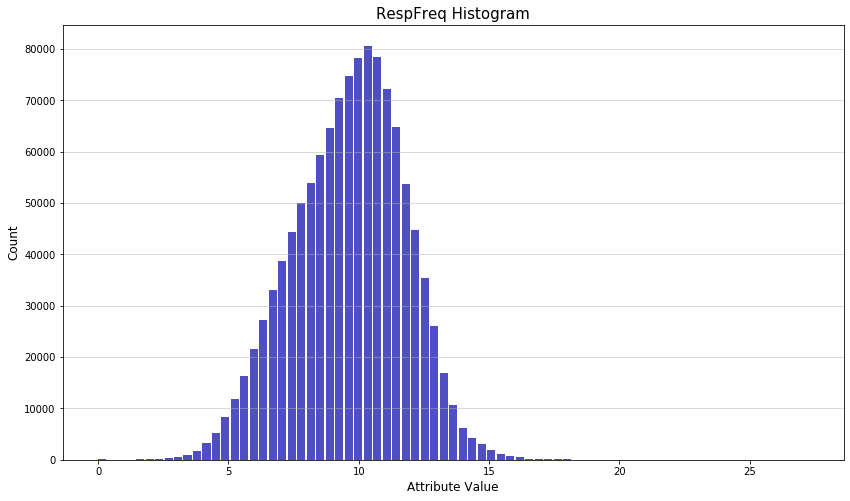

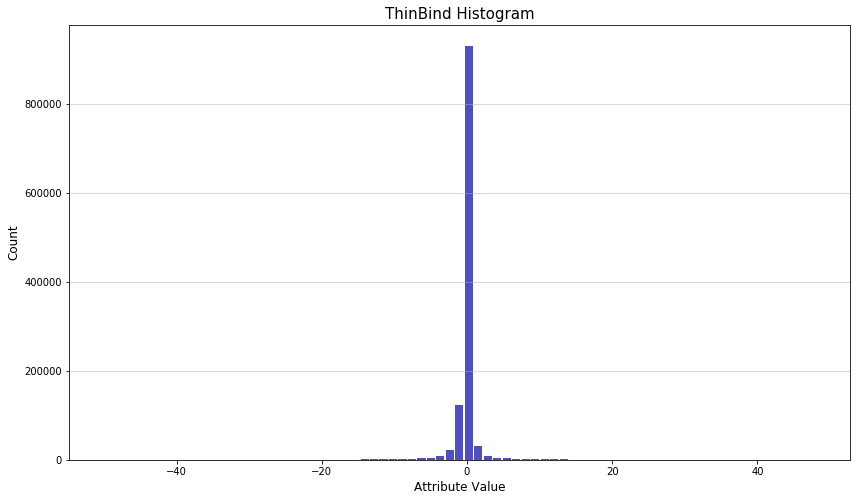

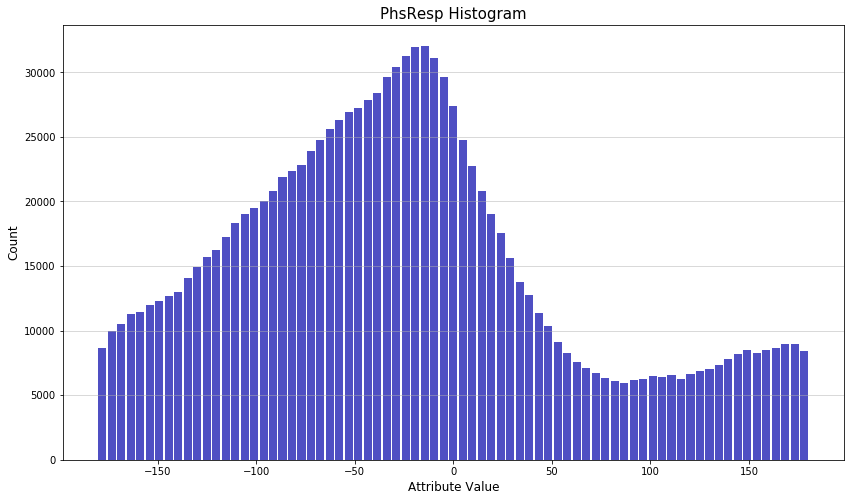

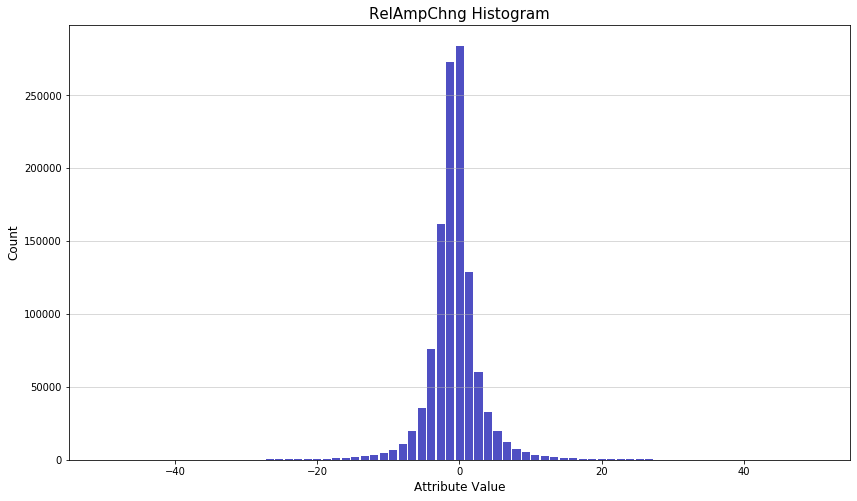

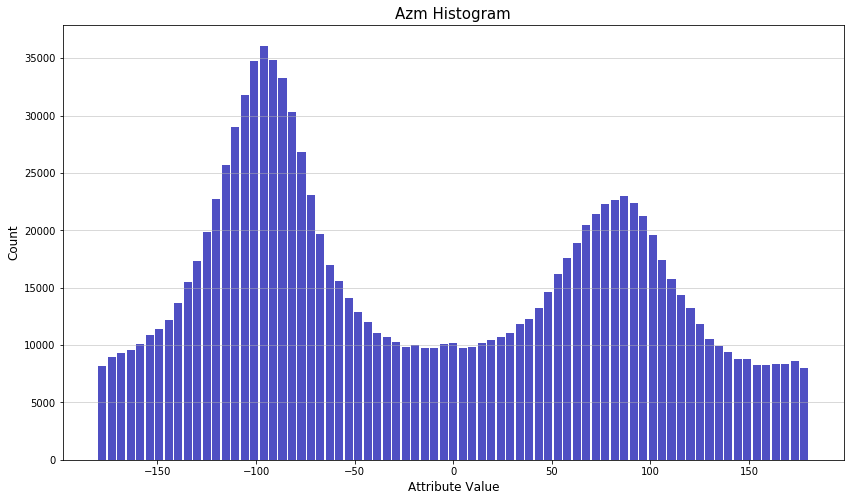

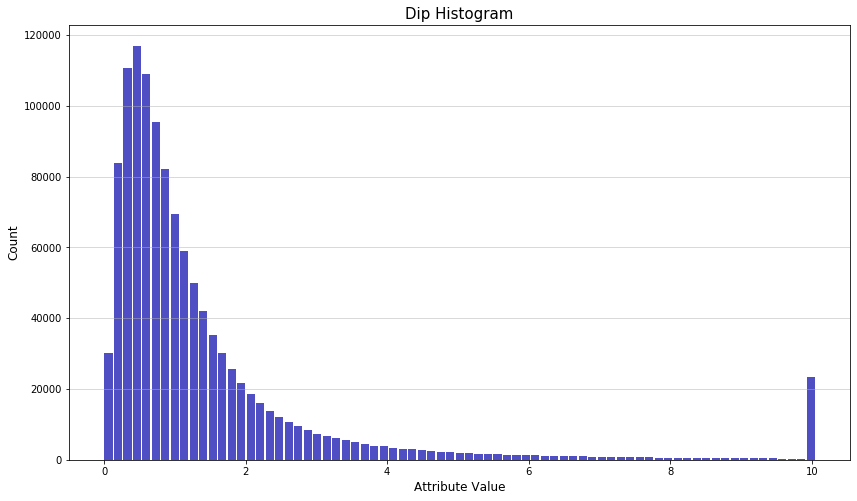

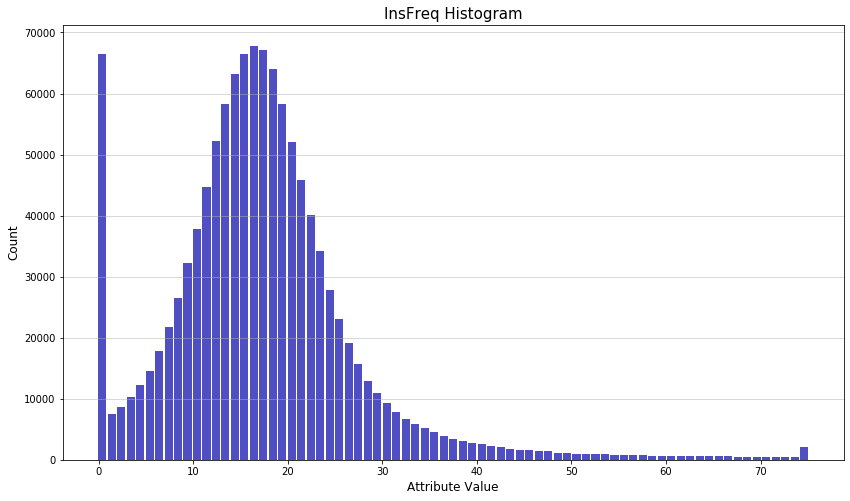

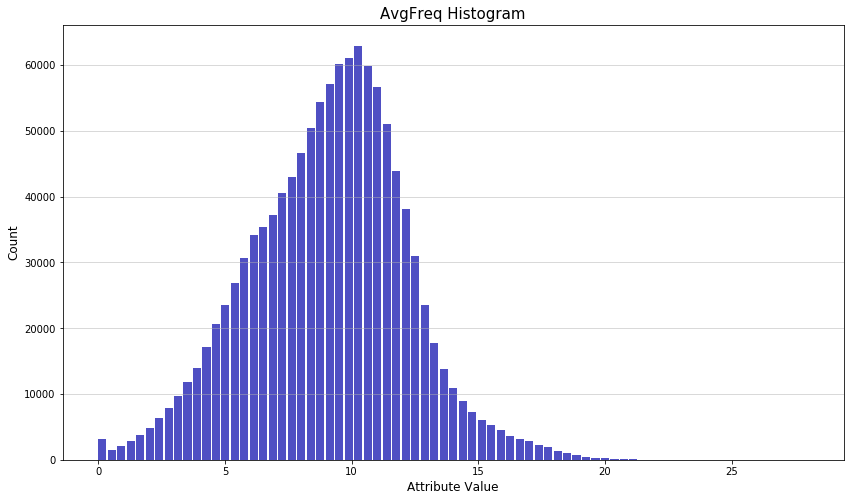

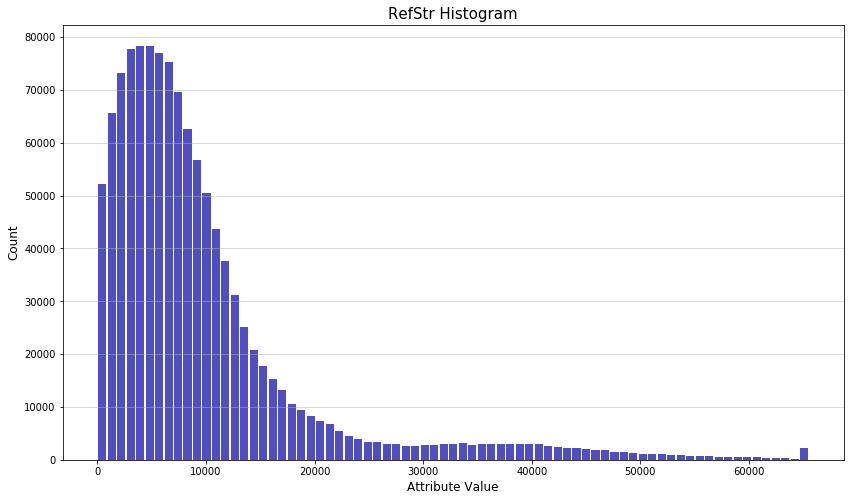

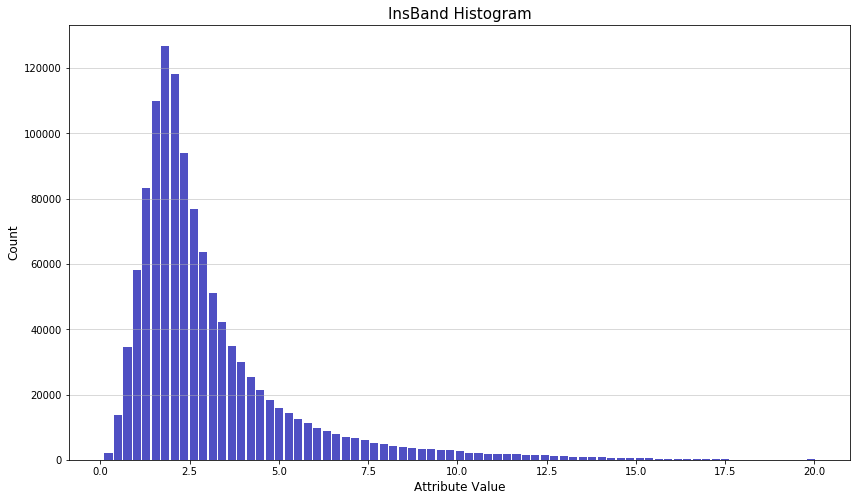

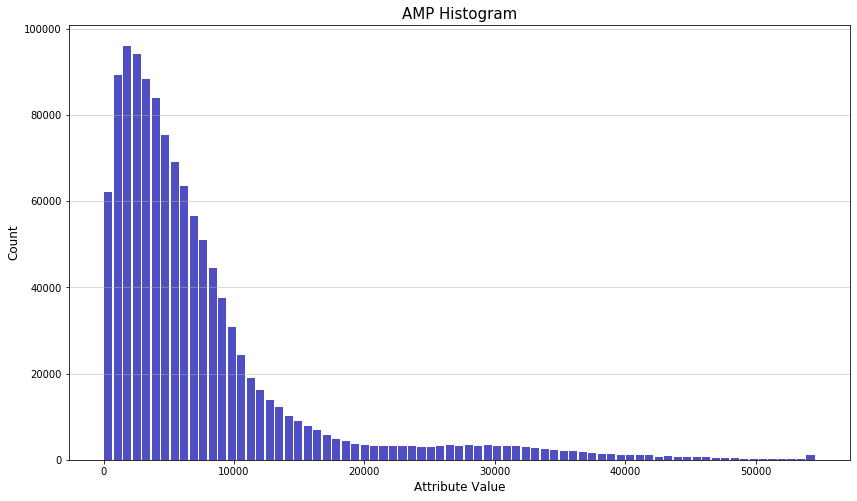

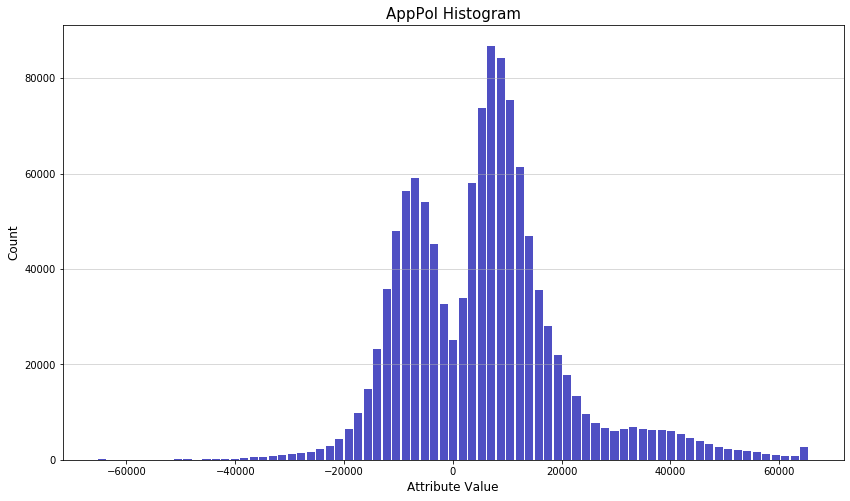

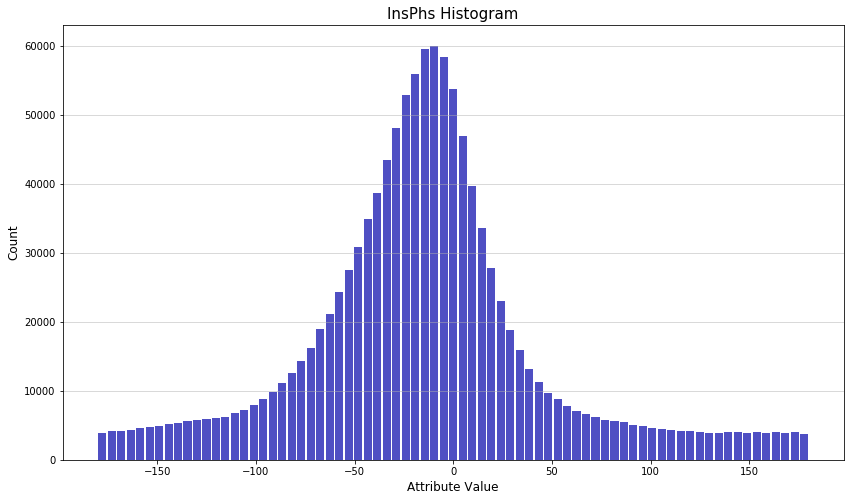

In [80]:
os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2/hist')

for n in d.keys():
    d[n] = d[n].reset_index()
    make_hist(n)

In [102]:
for n in d.keys():
    d[n]  = d[n].set_index(['inline', 'xline'])

In [13]:
df_list = [ v for k,v in d.items()] 
final_df = pd.concat(df_list ,axis=1)
#final_df = final_df.drop(['level_0', 'index'], axis = 1)

KeyError: "['level_0' 'index'] not found in axis"

In [108]:
sumDf = final_df.describe()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(sumDf)

print('---------Variance Calculation - All Attributes---------')
display(final_df.var())

               Disc            R3         QFact        CosPhs       RMSFreq  \
count  1.167508e+06  1.167508e+06  1.167508e+06  1.167508e+06  1.167513e+06   
mean   1.172582e+00  1.362341e+01  2.112155e+00  5.770552e-01  1.021368e+01   
std    3.292146e+00  1.252206e+01  1.218348e+00  5.689538e-01  7.190932e+01   
min   -2.711340e-02 -7.219102e+01 -5.685000e-03 -1.003988e+00  1.053520e-02   
25%    1.568392e-01  1.039944e+01  1.162048e+00  4.191588e-01  7.670055e+00   
50%    4.081750e-01  1.674537e+01  1.965852e+00  8.514541e-01  9.806315e+00   
75%    1.056654e+00  2.095315e+01  2.864823e+00  9.716387e-01  1.159684e+01   
max    9.786661e+01  7.250351e+01  5.027242e+00  1.003660e+00  5.439346e+04   

            DiscDip      RespFreq      ThinBind       PhsResp    RelAmpChng  \
count  1.167508e+06  1.167508e+06  1.167508e+06  1.167508e+06  1.167508e+06   
mean   4.426874e+00  9.632030e+00 -7.684635e-02 -2.522801e+01 -7.401307e-01   
std    8.890974e+00  2.133893e+00  3.204244e+00  8.

Disc          1.083823e+01
R3            1.568020e+02
QFact         1.484371e+00
CosPhs        3.237084e-01
RMSFreq       5.170950e+03
DiscDip       7.904942e+01
RespFreq      4.553500e+00
ThinBind      1.026718e+01
PhsResp       7.218175e+03
RelAmpChng    1.572935e+01
Azm           9.620603e+03
Dip           3.177861e+00
InsFreq       1.039627e+02
AvgFreq       9.533123e+00
RefStr        1.020067e+08
InsBand       5.275759e+00
AMP           6.315166e+07
AppPol        2.117121e+08
InsPhs        3.872961e+03
dtype: float64

In [110]:
os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2')
final_df.to_parquet('smallVol_df.parquet.gzip',compression='gzip')

In [16]:
os.chdir('/Landmark1/phase2_storage_sfml/')
final_df.to_parquet('smallVol_geo.parquet.gzip',compression='gzip')